# Technika regulacji - Projekt 3&4

**Autorzy:** Iwo Chwiszczuk 280043, Szymon Flis 280153

📅 **Data:** 8 czerwca 2025

## Przygotowanie potrzebnych bibliotek i narzędzi oraz wyliczenie stałych A, B i C

In [60]:
import sympy as sp
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
sp.init_printing()

y_k = sp.IndexedBase('y')
u_k = sp.IndexedBase('u')

A, B = 3, 3
C = A + B

impulse_input = lambda x=100, A=1: np.concatenate(([A], np.zeros(x-1)))
step_input = lambda x=100, A=1: np.ones(x) * A

## Zadanie 1

### Wyprowadzenie równań różnicowych z równań różniczkowych dla dwóch wybranych czasów próbkowania

#### Funkcja wyznaczająca równanie różnicowe, dla danego równania różniczkowego i czasu próbkowania

In [61]:
from sympy.abc import t
y_t = sp.Function('y')(t)
k = sp.symbols('k', integer=True)

def differential_to_difference(differential_eq, h):
    difference_eq = differential_eq.subs({
        sp.diff(y_t, t, t): (y_k[k] - 2*y_k[k-1] + y_k[k-2]) / h**2,
        sp.diff(y_t, t): (y_k[k] - y_k[k-1]) / h,
        y_t: y_k[k],
        t: h*k
    })

    return difference_eq

h1, h2 = 0.1, 0.5
eq1 = sp.Eq(sp.diff(y_t, t, t) + 3*sp.diff(y_t, t) + y_t, sp.sin(sp.Symbol('omega')*t))
eq2 = sp.Eq(sp.diff(y_t, t, t) + sp.diff(y_t, t) - 2*y_t, 0)
eq3 = sp.Eq(sp.diff(y_t, t, t) + 3*sp.diff(y_t, t) + y_t, t)

display(Markdown(f"#### **Obiekt I**"))
display(Markdown(f"**Równanie różniczkowe:**<br>${sp.latex(eq1)}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h1}:**<br>${sp.latex(differential_to_difference(eq1, h1))}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h2}:**<br>${sp.latex(differential_to_difference(eq1, h2))}$"))

display(Markdown(f"#### **Obiekt II**"))
display(Markdown(f"**Równanie różniczkowe:**<br>${sp.latex(eq2)}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h1}:**<br>${sp.latex(differential_to_difference(eq2, h1))}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h2}:**<br>${sp.latex(differential_to_difference(eq2, h2))}$"))

display(Markdown(f"#### **Obiekt III**"))
display(Markdown(f"**Równanie różniczkowe:**<br>${sp.latex(eq3)}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h1}:**<br>${sp.latex(differential_to_difference(eq3, h1))}$"))
display(Markdown(f"**Równanie różnicowe dla h = {h2}:**<br>${sp.latex(differential_to_difference(eq3, h2))}$"))


#### **Obiekt I**

**Równanie różniczkowe:**<br>$y{\left(t \right)} + 3 \frac{d}{d t} y{\left(t \right)} + \frac{d^{2}}{d t^{2}} y{\left(t \right)} = \sin{\left(\omega t \right)}$

**Równanie różnicowe dla h = 0.1:**<br>$- 230.0 {y}_{k - 1} + 100.0 {y}_{k - 2} + 131.0 {y}_{k} = \sin{\left(0.1 k \omega \right)}$

**Równanie różnicowe dla h = 0.5:**<br>$- 14.0 {y}_{k - 1} + 4.0 {y}_{k - 2} + 11.0 {y}_{k} = \sin{\left(0.5 k \omega \right)}$

#### **Obiekt II**

**Równanie różniczkowe:**<br>$- 2 y{\left(t \right)} + \frac{d}{d t} y{\left(t \right)} + \frac{d^{2}}{d t^{2}} y{\left(t \right)} = 0$

**Równanie różnicowe dla h = 0.1:**<br>$- 210.0 {y}_{k - 1} + 100.0 {y}_{k - 2} + 108.0 {y}_{k} = 0$

**Równanie różnicowe dla h = 0.5:**<br>$- 10.0 {y}_{k - 1} + 4.0 {y}_{k - 2} + 4.0 {y}_{k} = 0$

#### **Obiekt III**

**Równanie różniczkowe:**<br>$y{\left(t \right)} + 3 \frac{d}{d t} y{\left(t \right)} + \frac{d^{2}}{d t^{2}} y{\left(t \right)} = t$

**Równanie różnicowe dla h = 0.1:**<br>$- 230.0 {y}_{k - 1} + 100.0 {y}_{k - 2} + 131.0 {y}_{k} = 0.1 k$

**Równanie różnicowe dla h = 0.5:**<br>$- 14.0 {y}_{k - 1} + 4.0 {y}_{k - 2} + 11.0 {y}_{k} = 0.5 k$

### Symulacja odpowiedzi systemów opisanych równaniami różnicowymi

#### Funkcja symulująca odpowiedź układu o zadanym równaniu różnicowym na zadane pobudzenie

In [103]:
def simulate_discrete_system(difference_eq, initial_conditions, u_vals, u_name):
    steps = len(u_vals)
    y_vals = np.zeros(steps)
    
    for i in range(steps):
        to_sub = {u_k[k + n]: u_vals[i + n] if i + n >= 0 else 0 for n in range(-4, 1)}
        to_sub.update({y_k[k + n]: y_vals[i + n] if i + n >= 0 else 0 for n in range(-2, 1)})
        to_sub.update(initial_conditions)

        y_i = sp.solve(difference_eq, y_k[k])
        y_vals[i] = float(y_i[0].subs(to_sub))

    k_vals = np.arange(steps)
    plt.stem(k_vals, y_vals, linefmt='b-', markerfmt='bo', basefmt='r-', label='Odpowiedź y[k]')
    plt.stem(k_vals, u_vals, linefmt='g--', markerfmt='gx', basefmt='r-', label='Pobudzenie u[k]')
    plt.title(fr'Odpowiedź systemu dyskretnego ${sp.latex(difference_eq)}$ z warunkami początkowymi ${sp.latex(initial_conditions)}$ na {u_name}')
    plt.xlabel('k')
    plt.ylabel('Wartość')
    plt.grid(True)
    plt.legend()
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.show()

#### System I

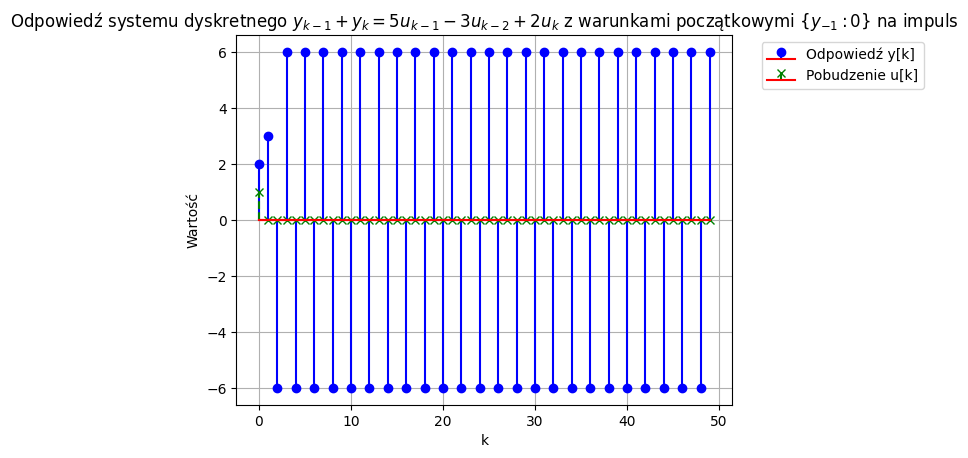

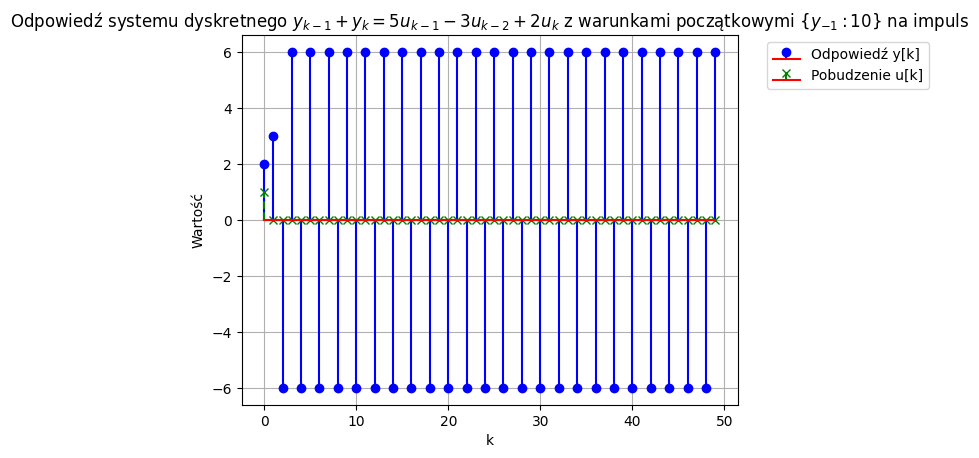

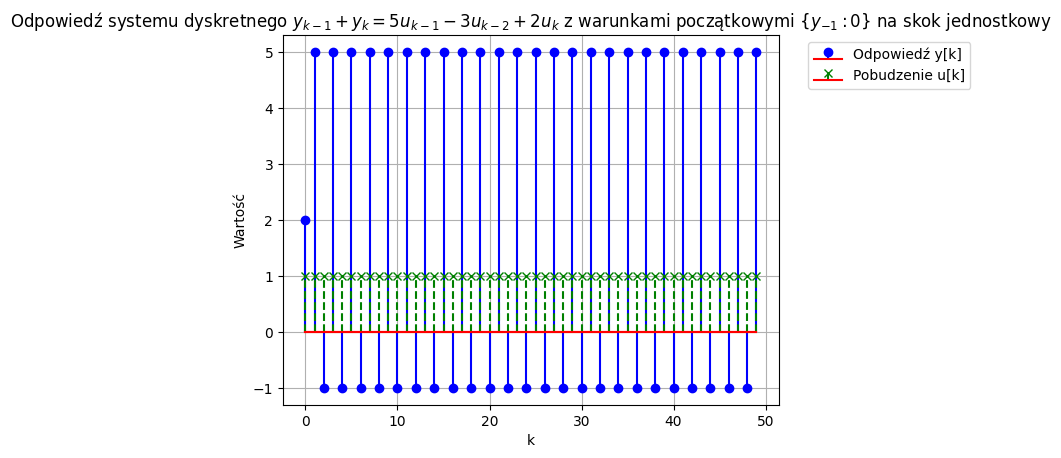

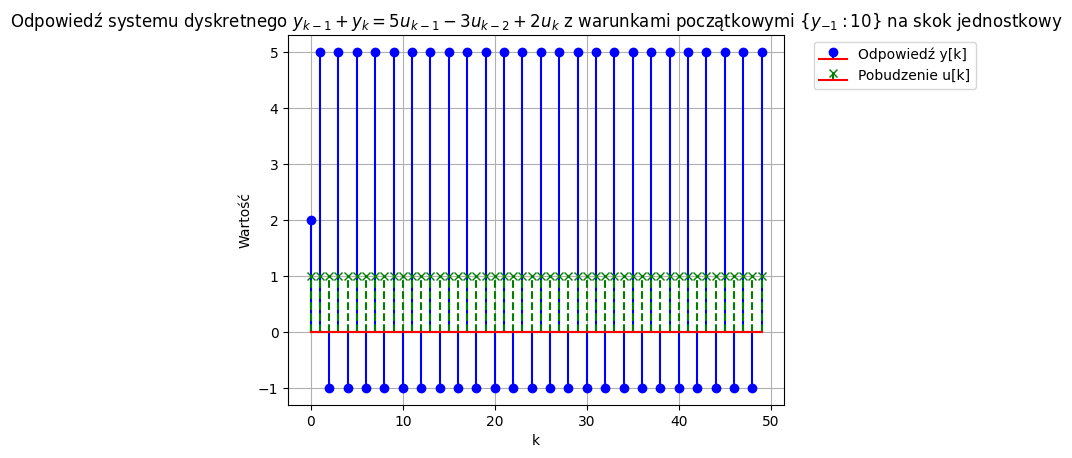

In [104]:
eq = sp.Eq(y_k[k-1] + y_k[k], 2*u_k[k] + 5*u_k[k-1] - 3*u_k[k-2])
ics1 = {y_k[-1]: 0}
ics2 = {y_k[-1]: 10}
simulate_discrete_system(eq, ics1, impulse_input(50), 'impuls')
simulate_discrete_system(eq, ics2, impulse_input(50), 'impuls')
simulate_discrete_system(eq, ics1, step_input(50), 'skok jednostkowy')
simulate_discrete_system(eq, ics2, step_input(50), 'skok jednostkowy')

#### System II

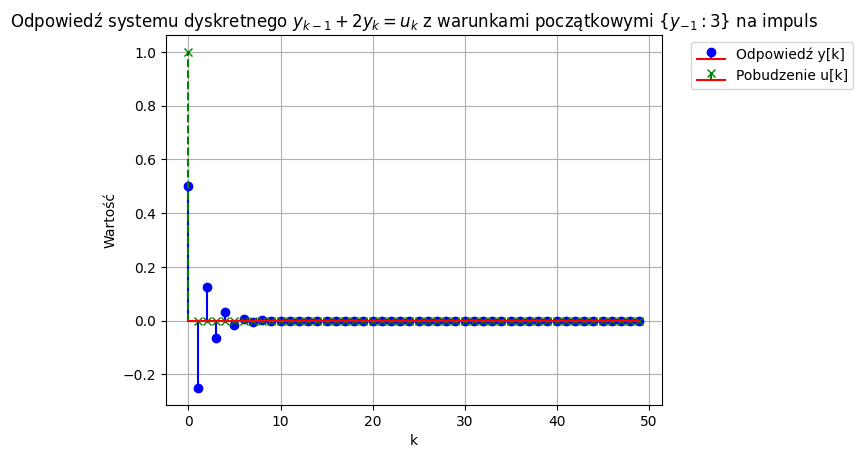

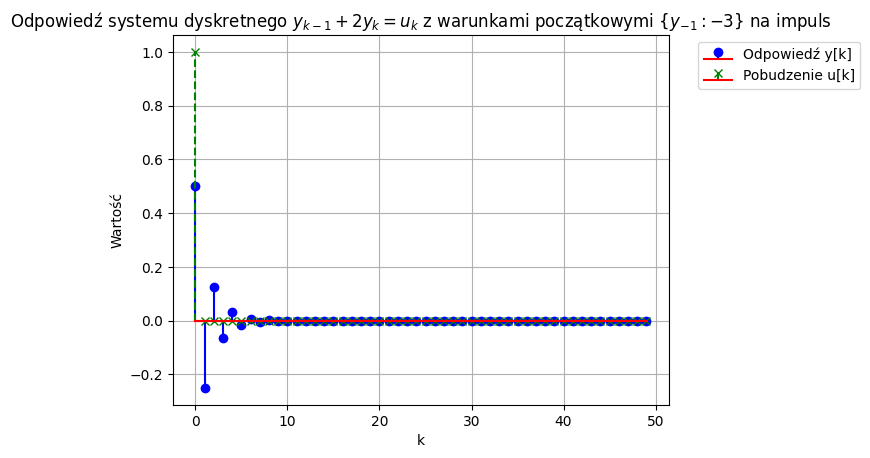

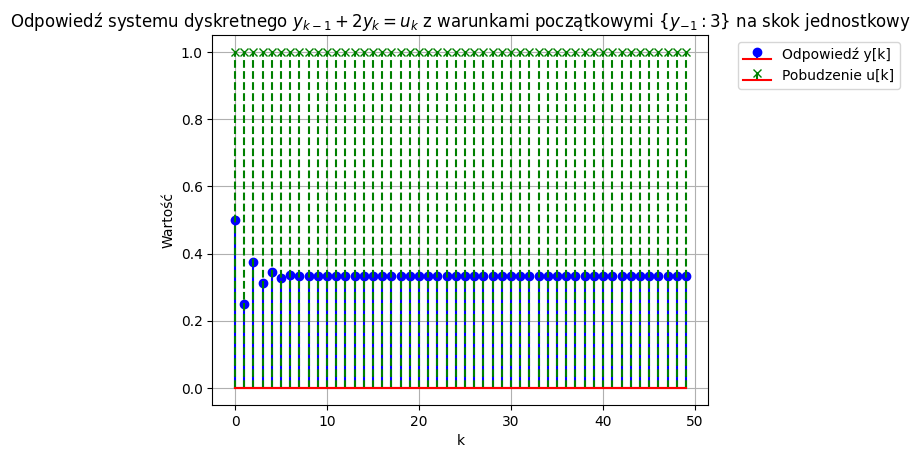

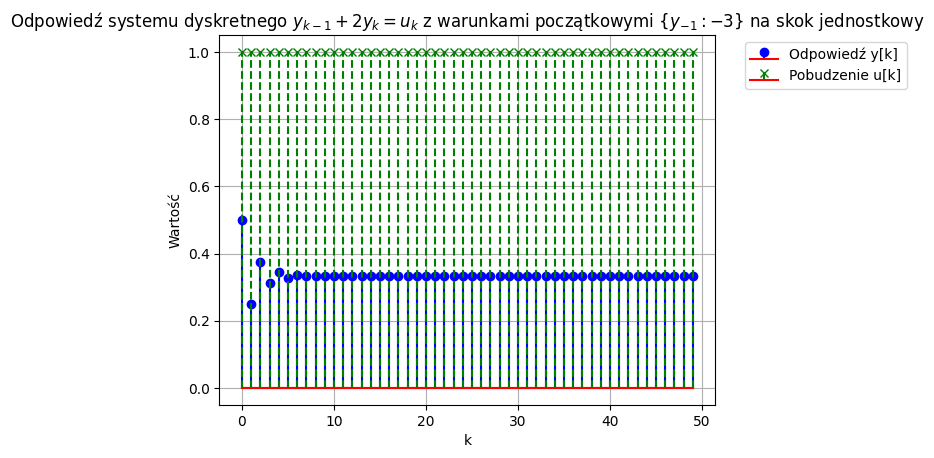

In [64]:
eq = sp.Eq(y_k[k-1] + 2*y_k[k], u_k[k])
ics1 = {y_k[-1]: 3}
ics2 = {y_k[-1]: -3}
simulate_discrete_system(eq, ics1, impulse_input(50), 'impuls')
simulate_discrete_system(eq, ics2, impulse_input(50), 'impuls')
simulate_discrete_system(eq, ics1, step_input(50), 'skok jednostkowy')
simulate_discrete_system(eq, ics2, step_input(50), 'skok jednostkowy')


#### System III

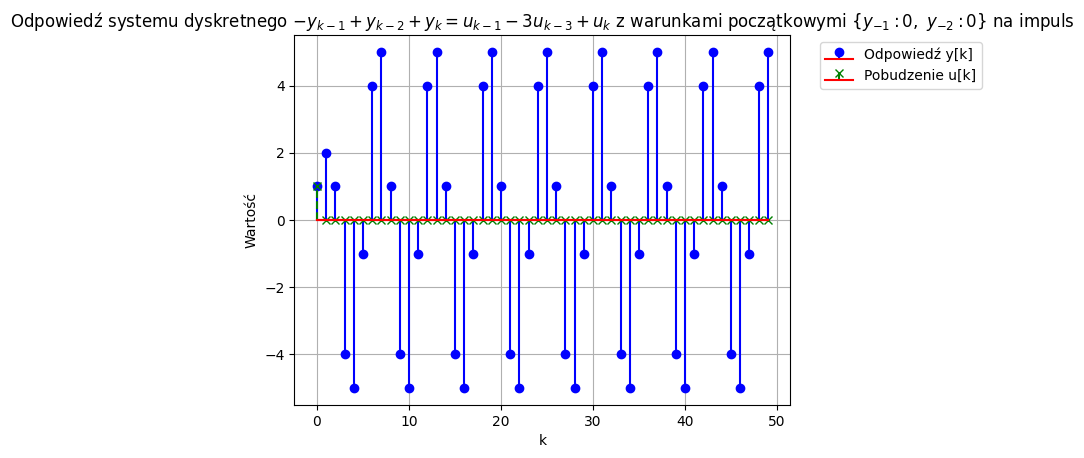

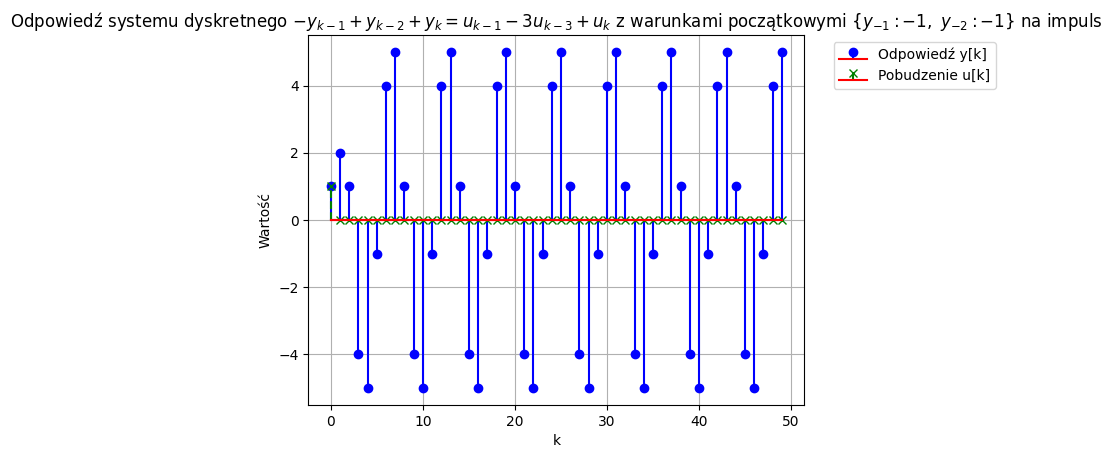

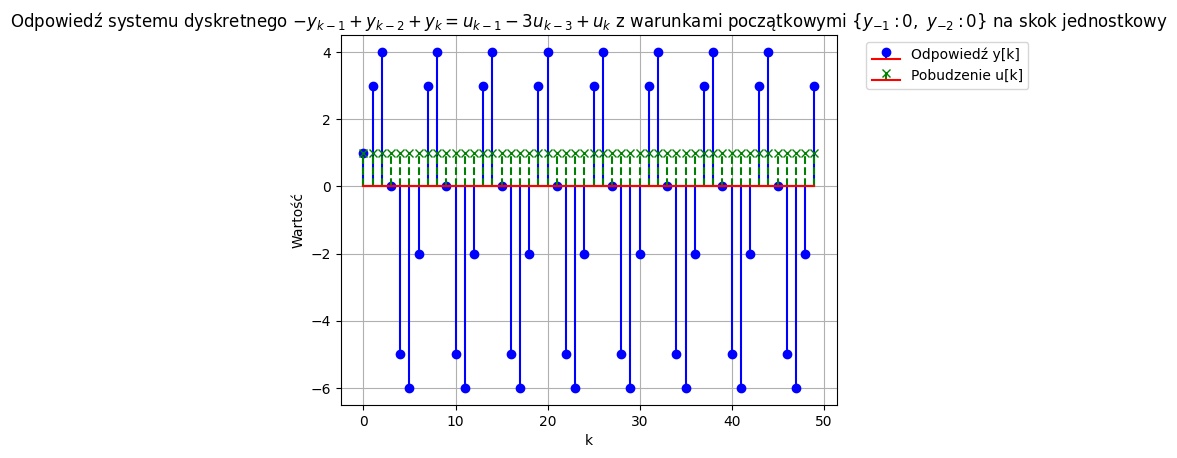

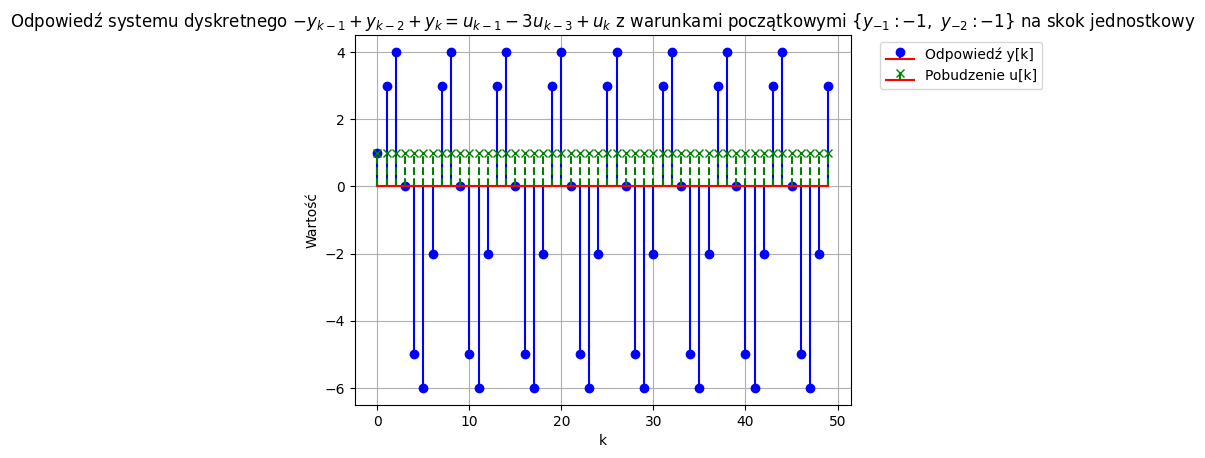

In [65]:
eq = sp.Eq(y_k[k-2] - y_k[k-1] + y_k[k], u_k[k] + u_k[k-1] - 3*u_k[k-3])
ics1 = {y_k[-1]: 0, y_k[-2]: 0}
ics2 = {y_k[-1]: -1, y_k[-2]: -1}
simulate_discrete_system(eq, ics1, impulse_input(50), 'impuls')
simulate_discrete_system(eq, ics2, impulse_input(50), 'impuls')
simulate_discrete_system(eq, ics1, step_input(50), 'skok jednostkowy')
simulate_discrete_system(eq, ics2, step_input(50), 'skok jednostkowy')

### Transformata Z

In [66]:
import lcapy as lc
from lcapy import s, t
from lcapy.discretetime import k, z, n

T = sp.symbols('T', positive=True)

G1_s = C/((s+A)*(s+B)*(s-1))
display(Markdown(f"$$G_1(s) = {sp.latex(G1_s)}$$"))

$$G_1(s) = \frac{6}{\left(s - 1\right) \left(s + 3\right)^{2}}$$

In [67]:
g1_kT = G1_s.inverse_laplace().subs({lc.Heaviside(t): 1, t: k*T}).args[0][0].simplify()
display(Markdown(f"$$g_1(kT) = {sp.latex(g1_kT)}$$"))
G1_z = lc.ZT(g1_kT, k, z)
display(Markdown(f"$$G_1(z) = {sp.latex(G1_z)}$$"))

$$g_1(kT) = \frac{3 \left(- 4 T k + e^{4 T k} - 1\right) e^{- 3 T k}}{8}$$

$$G_1(z) = - \frac{3 T z e^{3 T}}{2 \left(z e^{3 T} - 1\right)^{2}} - \frac{3 z e^{3 T}}{8 \left(z e^{3 T} - 1\right)} + \frac{3 z}{8 \left(z - e^{T}\right)}$$

### Odwrotna Transformata Z

In [68]:
izt_G1_z = lc.expr(G1_z).IZT().subs({n: k}).args[0][0].simplify()
display(Markdown(rf"$$Z^{{-1}}\{{G_1(z)\}} = {sp.latex(izt_G1_z)}$$"))

$$Z^{-1}\{G_1(z)\} = \frac{3 \left(- 4 T k + e^{4 T k} - 1\right) e^{- 3 T k}}{8}$$

### Wnioski
- Transformacja równań różniczkowych na różnicowe
    - Pokazano skuteczną metodę przejścia od równań różniczkowych (opisujących systemy ciągłe) do równań różnicowych (opisujących systemy dyskretne) dla różnych kroków czasowych h
    - Dla różnych obiektów otrzymano odpowiadające im równania różnicowe, co demonstruje uniwersalność metody
- Symulacja systemów dyskretnych
    - Zaimplementowana funkcja simulate_discrete_system pozwala na symulację odpowiedzi systemów dyskretnych na różne wymuszenia
    - Symulacje pokazują znaczący wpływ warunków początkowych na odpowiedź symulowanych systemów
    - Systemy wykazują różne zachowania w zależności od struktury równania różnicowego i warunków początkowych
- Transformata Z i Odwrotna Transformata Z
    - Wyznaczono Transformatę Z systemu na podstawie transmitancji ciągłej wykorzystując bibliotekę lcapy (która jest rozszerzeniem biblioteki sympy m.in. w zakresie działań w dziedzinie dyskretnej)
    - Wyznaczono Odwrotną Transformatę Z i potwierdzono jej poprawność porównując ją z oryginalną odpowiedzią impulsową w dziedzinie dyskretnej

## Zadanie 2

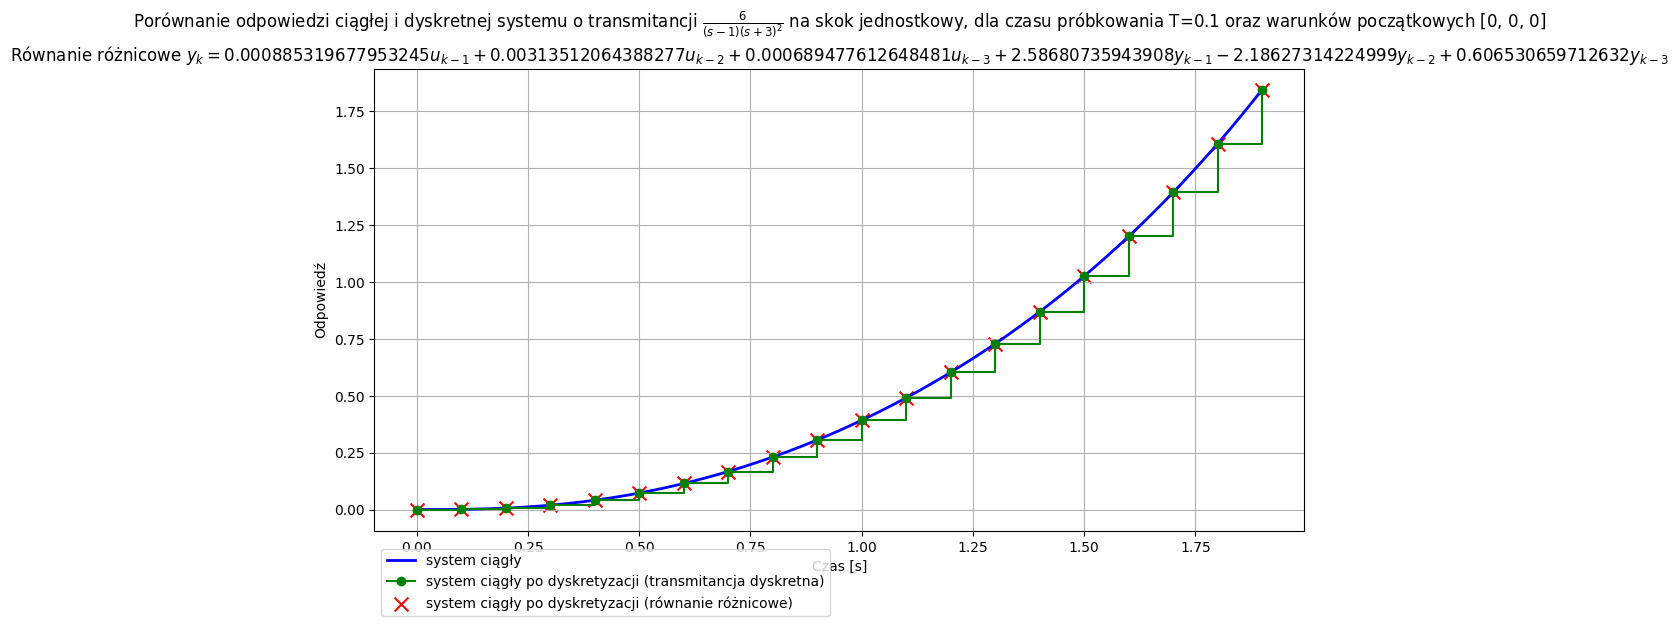

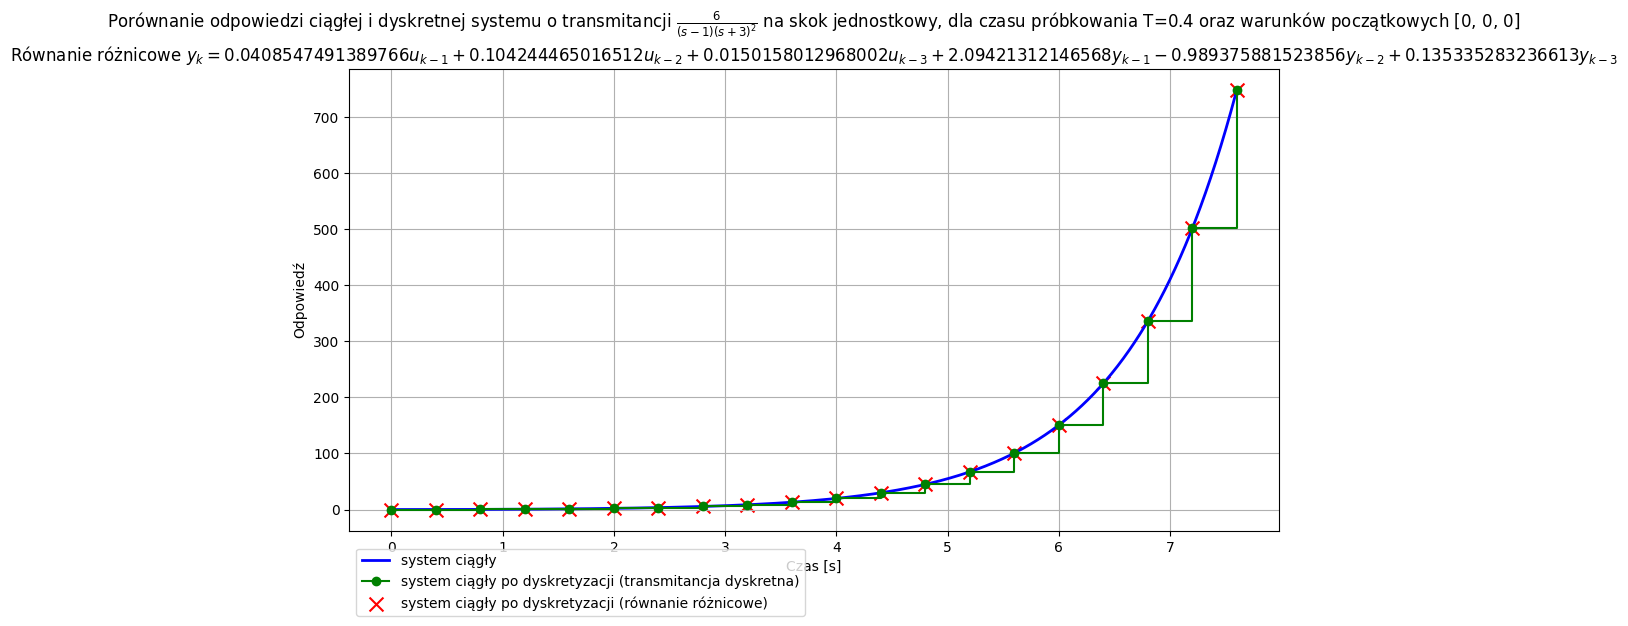

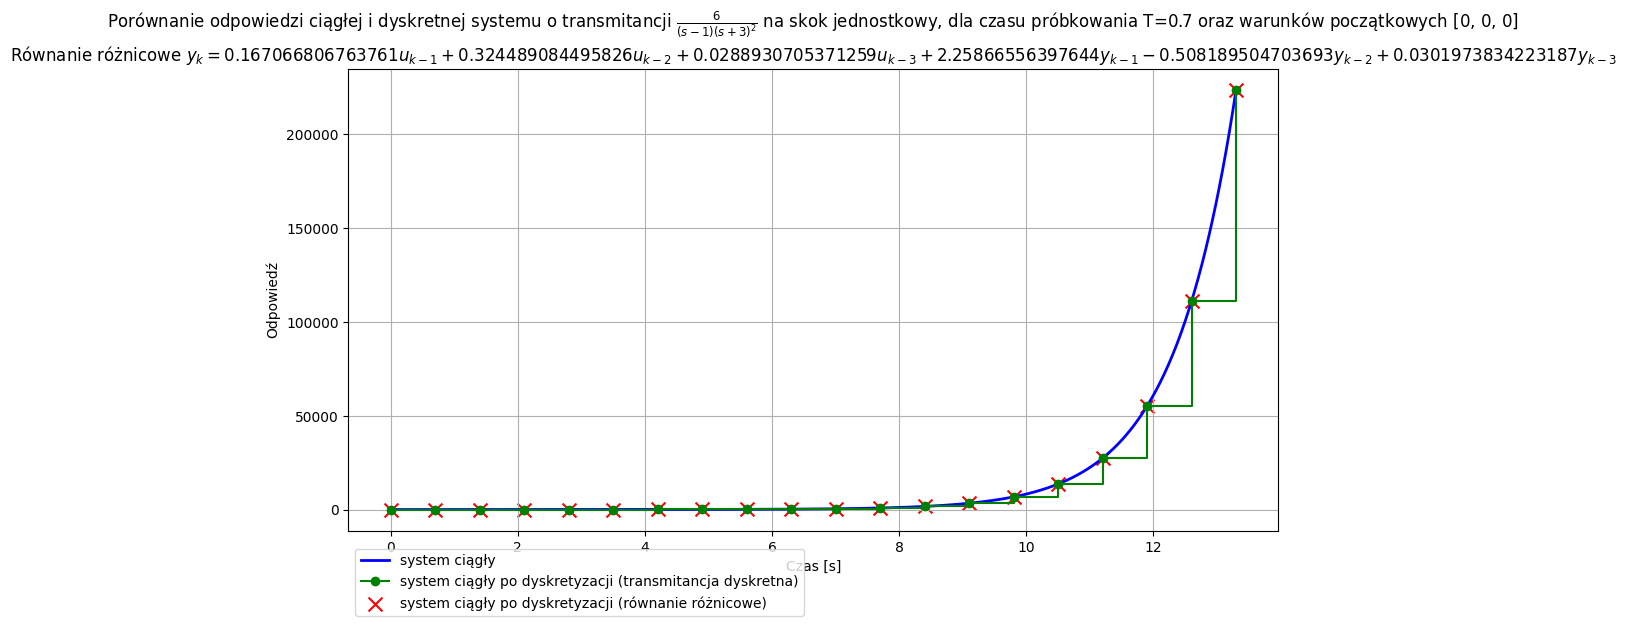

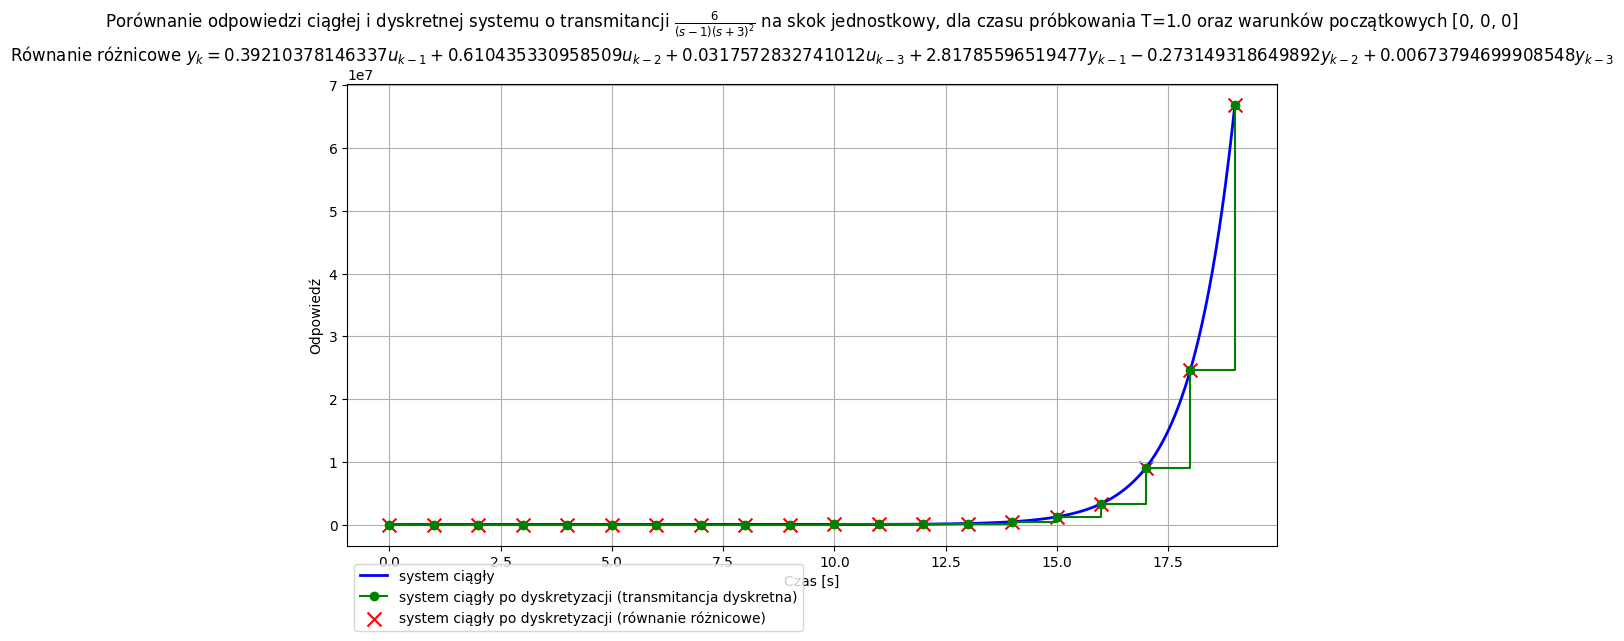

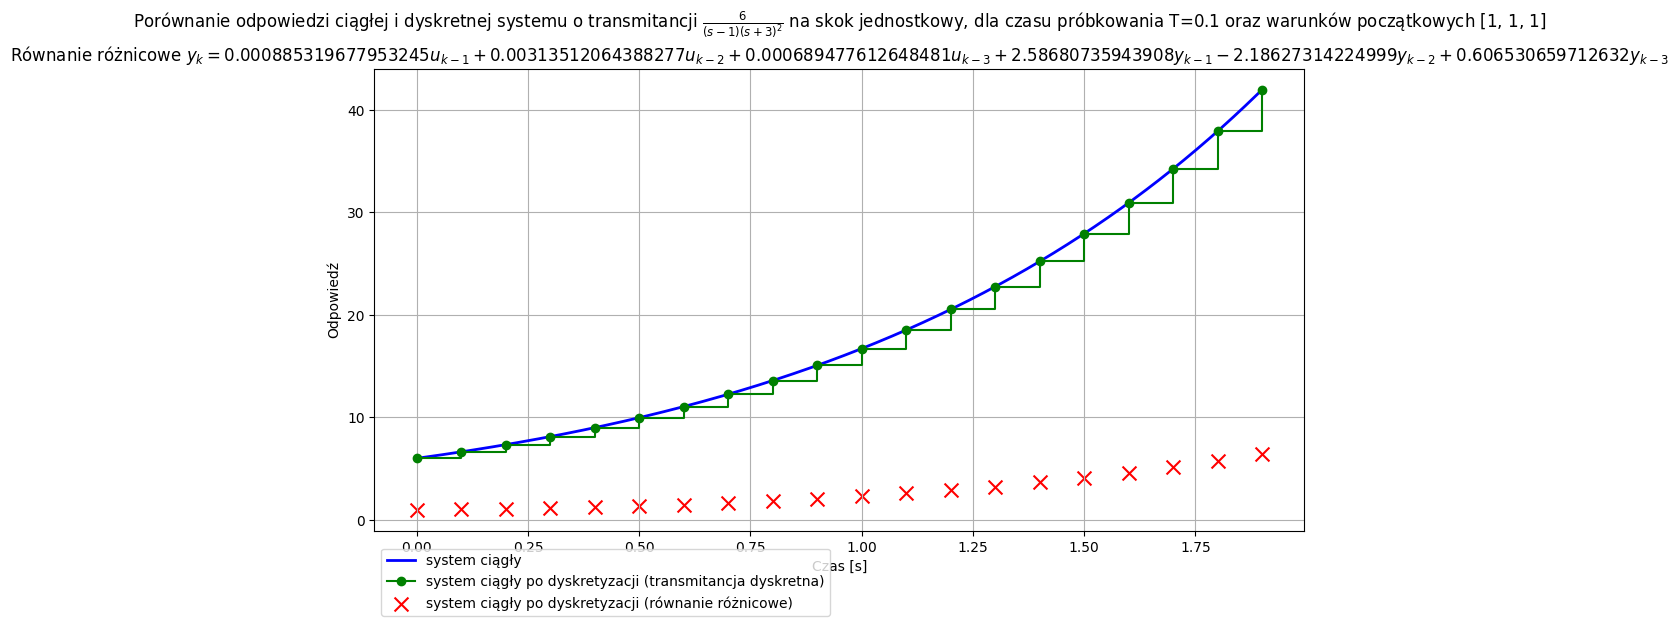

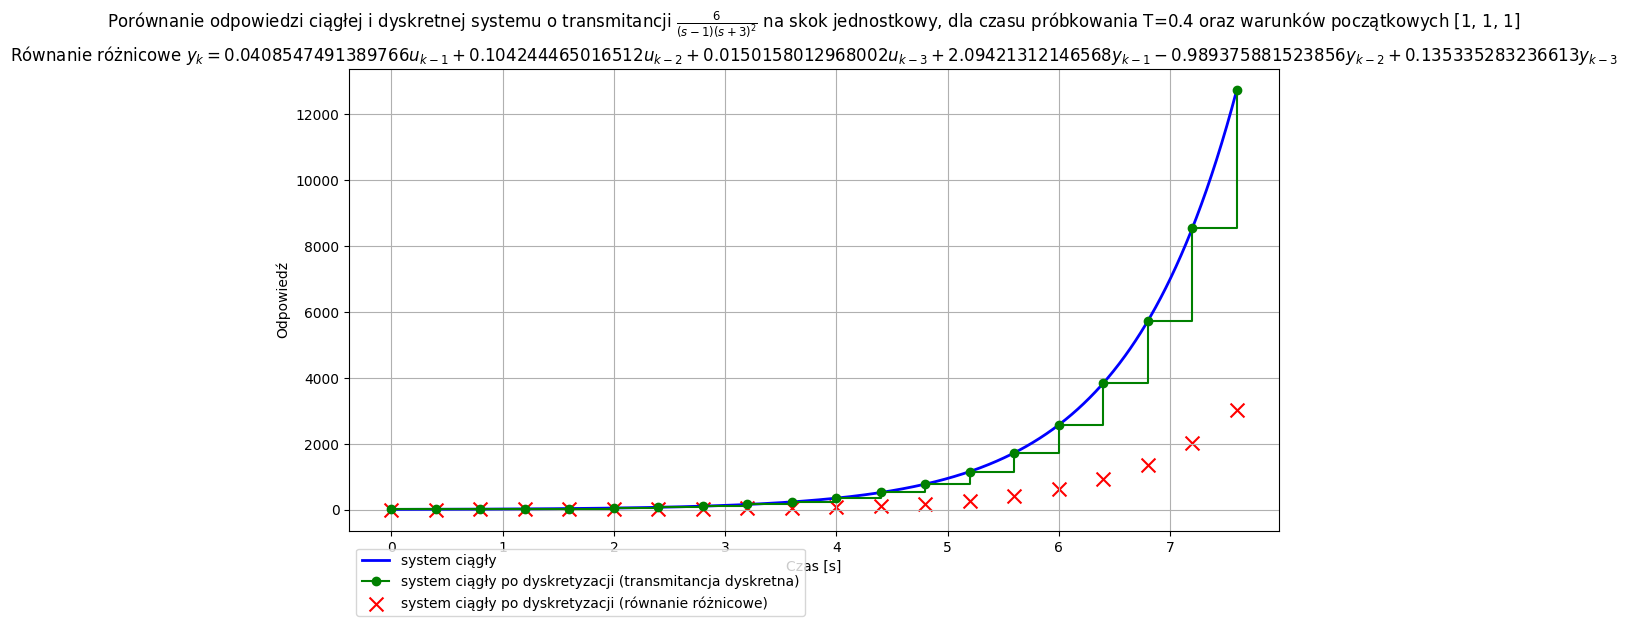

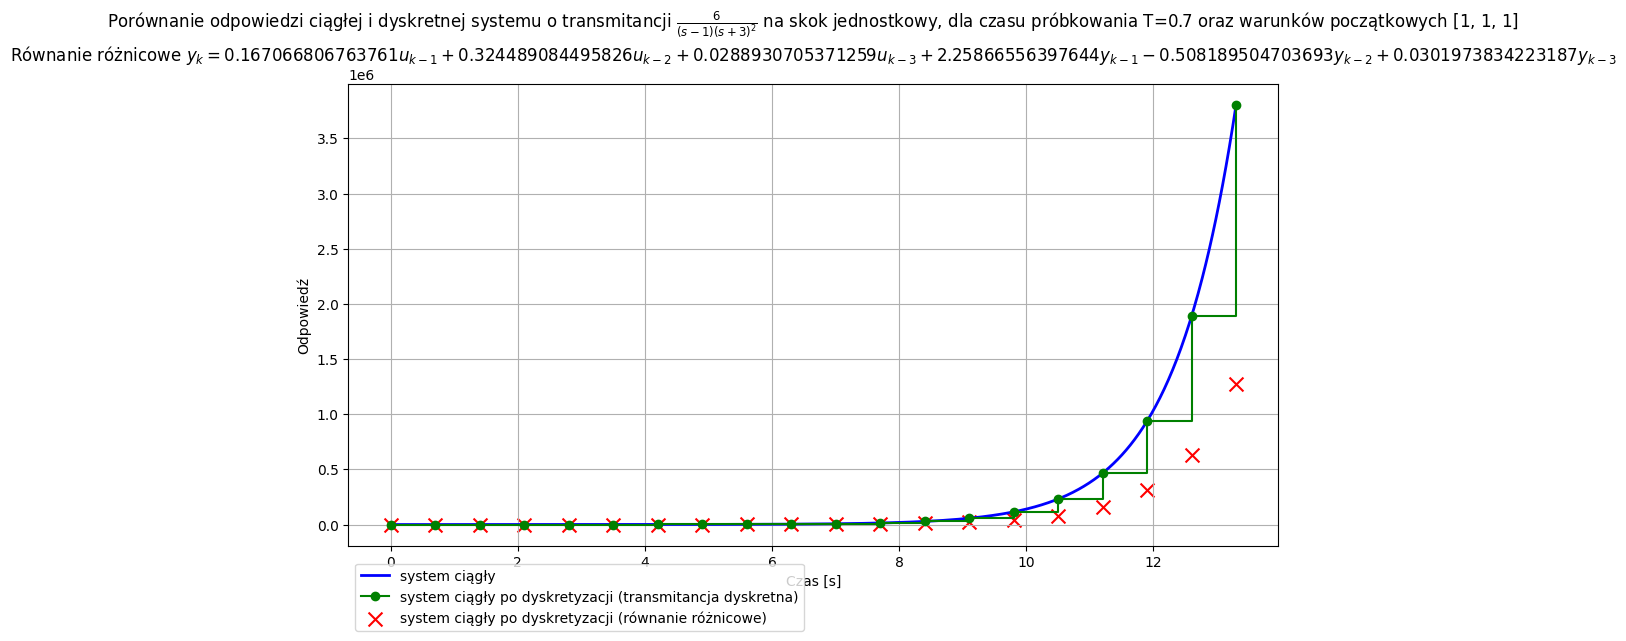

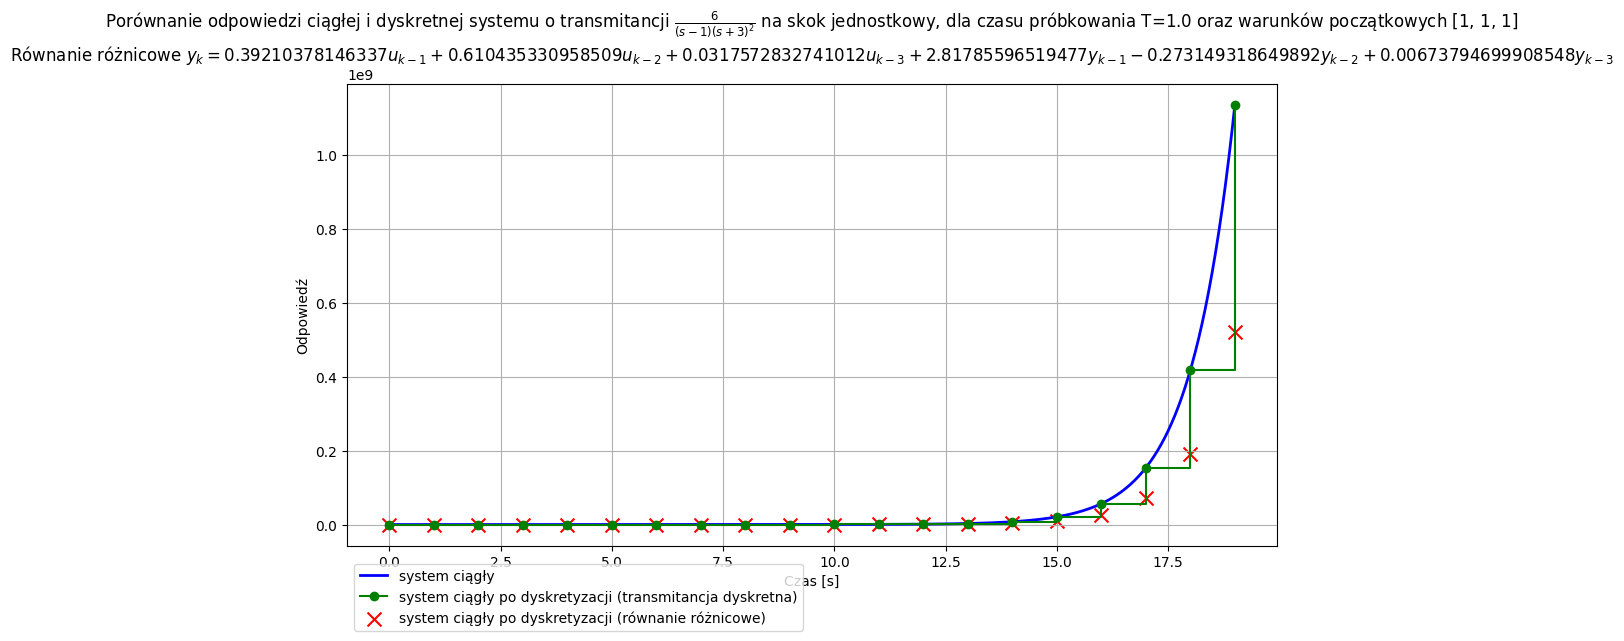

In [154]:
from sympy.abc import s
k = sp.symbols('k', integer=True)

G2_s = C/((s+A)*(s+B)*(s-1))

def compare_continuous_discrete(G_continuous_sympy, Ts: list, ics: list, u_signal: np.ndarray, u_alias: str, iterations: int):
    num = [float(c) for c in sp.Poly(sp.fraction(G_continuous_sympy)[0], s).all_coeffs()]
    den = [float(c) for c in sp.Poly(sp.fraction(G_continuous_sympy)[1], s).all_coeffs()]
    G_continuous_sys = ctrl.tf2ss(ctrl.TransferFunction(num, den))
    
    for T in Ts:
        t_continuous = np.linspace(0, (iterations-1) * T, 1000)
        y_continuous = ctrl.forced_response(G_continuous_sys, T=t_continuous, U=u_signal, X0=ics)[1]

        G_discrete_sys = ctrl.c2d(G_continuous_sys, T, method='zoh')
        t_discrete = np.arange(0, iterations) * T
        y_discrete = ctrl.forced_response(G_discrete_sys, T=t_discrete, U=u_signal[:iterations], X0=ics)[1]

        G_discrete = ctrl.ss2tf(G_discrete_sys)
        a = G_discrete.den[0][0]
        b = G_discrete.num[0][0]
        difference_eq = sp.Eq(
            y_k[k],
            -sum(a[i] * y_k[k - i] for i in range(1, len(a))) + sum(b[i] * u_k[k - i - 1] for i in range(len(b)))
        )

        y_difference = np.zeros(iterations)
        u_difference = u_signal[:iterations]
        for i in range(iterations):
            to_sub = {y_k[k + n]: y_difference[i + n] if i+n >= 0 else ics[-(i+n)-1] for n in range(-3, 0)}
            to_sub.update({u_k[k + n]: u_difference[i + n] if i+n >= 0 else 0 for n in range(-4, 0)})
            y_difference[i] = float(sp.solve(difference_eq, y_k[k])[0].subs(to_sub))

        plt.figure(figsize=(12, 6))
        plt.plot(t_continuous, y_continuous, 'b-', linewidth=2, label='system ciągły')
        plt.step(t_discrete, y_discrete, 'o-', color='green', where='post', label=f'system ciągły po dyskretyzacji (transmitancja dyskretna)')
        plt.scatter(t_discrete, y_difference, color='red', marker='x', s=100, label='system ciągły po dyskretyzacji (równanie różnicowe)')
        plt.xlabel('Czas [s]')
        plt.ylabel('Odpowiedź')
        plt.title(f'Porównanie odpowiedzi ciągłej i dyskretnej systemu o transmitancji ${sp.latex(G_continuous_sympy)}$ na {u_alias}, dla czasu próbkowania {T=} oraz warunków początkowych {ics}\nRównanie różnicowe ${sp.latex(difference_eq)}$')
        plt.legend()
        plt.legend(loc='lower left', bbox_to_anchor=(0, -0.2))
        plt.grid(True)
        plt.show()


compare_continuous_discrete(G2_s, Ts=[0.1, 0.4, 0.7, 1.0], ics=[0, 0, 0], u_signal=step_input(1000), u_alias="skok jednostkowy", iterations=20)
compare_continuous_discrete(G2_s, Ts=[0.1, 0.4, 0.7, 1.0], ics=[1, 1, 1], u_signal=step_input(1000), u_alias="skok jednostkowy", iterations=20)

### Wnioski
- Odpowiedź systemu dyskretnego wyznaczona metodą ZOH pokrywa się z odpowiedzią układu ciągłego przy odpowiednio dobranym czasie próbkowania i zerowych warunkach początkowych, co potwierdza poprawność dyskretyzacji (`ctrl.c2d(..., method='zoh')`).

- W pierwotnej wersji, równanie różnicowe wyznaczone z transmitancji dyskretnej generowało odpowiedź przesuniętą w czasie. Wynikało to z nieuwzględnienia opóźnienia w działaniu wejścia $u[k]$, charakterystycznego dla metody ZOH.

- Po uwzględnieniu tego opóźnienia poprzez przesunięcie indeksów wejścia o 1 wstecz (czyli stosując $u[k - i - 1]$ zamiast $u[k - i]$), odpowiedź z równania różnicowego zaczęła się pokrywać z odpowiedzią dyskretną oraz ciągłą, eliminując przesunięcie.

- Poprawione równanie różnicowe ma postać:
  $y[k] = -\sum_{i=1}^{n} a_i \cdot y[k - i] + \sum_{i=0}^{m} b_i \cdot u[k - i - 1]$
  i w pełni odzwierciedla dynamikę układu dyskretnego uzyskanego metodą ZOH.

- Transmitancja dyskretna nadal zakłada zerowe warunki początkowe, dlatego dla niezerowych stanów początkowych odpowiedź wyznaczona z równania różnicowego nie jest zgodna z rzeczywistą dynamiką systemu.

- Aby uwzględnić warunki początkowe w odpowiedzi dyskretnej, konieczne jest użycie reprezentacji w przestrzeni stanów.

- Inne metody dyskretyzacji (np. `'tustin'`, `'foh'`) mogą zmieniać sposób oddziaływania wejścia na wyjście, ale także wprowadzają inne uproszczenia lub przybliżenia i niekoniecznie oddają dokładnie dynamikę oryginalnego układu.



## Zadanie 3